In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from Twitter_bot_detection_713.data_prep import tweet_df_cleaner, user_df_cleaner, get_final_tweet_data, get_user_training_data

2021-11-30 19:09:45.452035: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-30 19:09:45.452091: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [18]:
X_train_user, x_test_user, y_train_user, y_test_user = get_user_training_data()

In [23]:
x_test_user

,author_id,username,user_display_name,user_desc,user_created_at,user_verified,user_private,user_followers_cnt,user_following_cnt,user_tweet_count,user_list_count
14200,377591138,D_smallwood54,The_Gerber_Baby,#Team2014 | #TeamMossyOak | #TeamSkoal | #Team...,2011-09-21 20:25:27+00:00,False,False,263,0,8807,3
10437,2178230389,hernanes,Hernanes,A confiança é a luz do pensamento!,2013-11-06 14:53:54+00:00,True,False,1144855,175,296,721
19535,2555521162,TransferNews42,TransferNews42,Bringing the latest transfer news and rumours ...,2014-05-20 15:27:22+00:00,False,False,91,0,64,1
16084,619373442,yvette_mier,yvette mier,To follow Jesus is the greatest adventure of t...,2012-06-26 18:04:39+00:00,False,False,13,0,2813,0
32291,18583283,awrightolsen,Amy Wright-Olsen,BBC watcher / animal lover / eclectic friend c...,2009-01-03 18:01:52+00:00,False,False,120,301,1843,8
...,...,...,...,...,...,...,...,...,...,...,...
13871,402754479,ABJevents,abjevents,Keep track of top local events and who's who i...,2011-11-01 14:42:24+00:00,False,False,865,566,1088,37
23071,877608082980966405,ReggieWilson_,Reggie Wilson,Award-Winning Sports Anchor/Reporter. #Mizzou ...,2017-06-21 19:24:06+00:00,False,False,1022,247,7560,6
25646,118936984,sharonasoks,"Sharona, PhD, MPH",Science Communicator; PhD in Public Health. Fo...,2010-03-02 04:41:13+00:00,False,False,252,888,4744,9
406,351799946,mrBrehm860,LiL tErpy,prolly somewhere dabbin,2011-08-09 19:07:11+00:00,False,False,354,0,25950,7


In [3]:
user_df = pd.read_csv('../raw_data/users_data.csv',
                          sep='\t',
                          lineterminator='\n')

In [4]:
df = user_df_cleaner(user_df)

In [5]:
df

,author_id,username,user_display_name,user_desc,user_created_at,user_verified,user_private,user_followers_cnt,user_following_cnt,user_tweet_count,user_list_count,target
0,787405734442958848,best_in_dumbest,The Best In Dumbest,"Blame @xaiax, Inspired by @MakingInvisible, us...",2016-10-15 21:32:11+00:00,False,False,1848,5,14542,0,bot
1,796216118331310080,CJRubinPhoto,CJ Rubin,Photographing the American West since 1980. I ...,2016-11-09 05:01:30+00:00,False,False,812,845,251,5,human
2,875949740503859204,SVGEGENT,🔥𝖙𝖍𝖊 𝖘𝖆𝖛𝖆𝖌𝖊 𝖌𝖊𝖓𝖙𝖑𝖊𝖒𝖆𝖓🔥,Part savage all gentleman ...,2017-06-17 05:34:27+00:00,False,False,182,885,1288,2,human
3,756119643622735875,TinkerVHECHK5,Danielle Tinker,Wife.Godmother.Friend.Feline Fanatic! Principa...,2016-07-21 13:32:25+00:00,False,False,657,747,1920,2,human
4,464781334,JoleonLescott,Joleon Lescott,England U21 Assistant Coach | @pumafootball Am...,2012-01-15 16:32:35+00:00,True,False,739915,120,4459,1800,human
...,...,...,...,...,...,...,...,...,...,...,...,...
36229,63963107,butchsekab,Rosemary Pearman nee Bakes,"Unemployed! Retail Assistant, Stocktaker, Dry ...",2009-08-08 13:11:15+00:00,False,False,152,1219,487,3,human
36230,1064042478,Mathieu_Era,Tyrann Mathieu,FOLLOW ME ON IG.,2013-01-05 21:35:37+00:00,True,False,1237990,799,27326,1475,human
36231,1089732602,SDalmaoficial,Sergio Dalma,Bienvenid@s al Twitter Oficial de Sergio Dalma...,2013-01-14 18:05:54+00:00,True,False,85615,189,6640,270,human
36232,815529979,VinceYearly,Mr. Vance,Just a good guy wrapped up in a bad system.\nA...,2012-09-10 16:12:02+00:00,False,False,137,166,1040,3,human


<AxesSubplot:xlabel='user_followers_cnt', ylabel='user_tweet_count'>

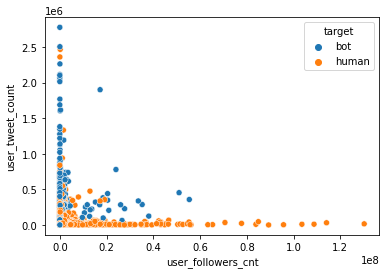

In [19]:
sns.scatterplot(data=df ,x='user_followers_cnt', y='user_tweet_count', hue='target')

KeyboardInterrupt: 

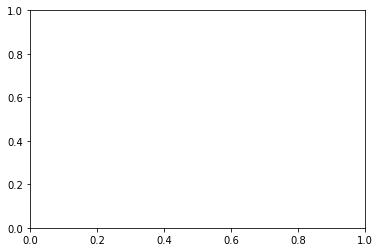

In [50]:
sns.histplot(data=df ,x='user_followers_cnt', y='user_tweet_count', hue='target')

<AxesSubplot:xlabel='target', ylabel='user_followers_cnt'>

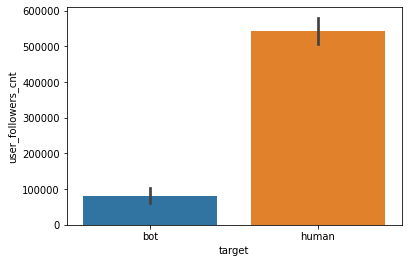

In [49]:
sns.barplot(data=df, x='target', y='user_followers_cnt')

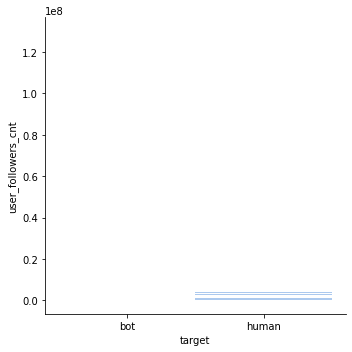

In [58]:
sns.displot(data=df, x='target', y='user_followers_cnt')

In [60]:
df[['target', 'user_followers_cnt']].groupby('target').aggregate(['mean', 'max', 'min', 'median', 'std'])

user_followers_cnt                                     
                     mean        max min  median           std
target                                                        
bot          80109.478684   55384098   0    25.0  1.182795e+06
human       541998.321061  130221053   0  1097.0  3.012221e+06

In [61]:
df.corr()

,author_id,user_verified,user_private,user_followers_cnt,user_following_cnt,user_tweet_count,user_list_count
author_id,1.000000,-0.190439,-0.020886,-0.060127,-0.028258,-0.080968,-0.021223
user_verified,-0.190439,1.000000,-0.097733,0.272780,0.055422,0.085715,0.095118
user_private,-0.020886,-0.097733,1.000000,-0.030872,-0.012360,-0.010292,-0.010710
user_followers_cnt,-0.060127,0.272780,-0.030872,1.000000,0.049412,0.035157,0.245892
user_following_cnt,-0.028258,0.055422,-0.012360,0.049412,1.000000,0.073782,0.018818
user_tweet_count,-0.080968,0.085715,-0.010292,0.035157,0.073782,1.000000,0.024108
user_list_count,-0.021223,0.095118,-0.010710,0.245892,0.018818,0.024108,1.000000


In [ ]:
sns.displot(df[df['target'] == 'bot'], x='user_followers_cnt')

<AxesSubplot:xlabel='target', ylabel='user_following_cnt'>

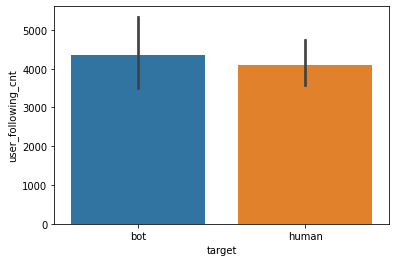

In [48]:
sns.barplot(data=df, x='target', y='user_following_cnt')

<AxesSubplot:xlabel='target', ylabel='user_tweet_count'>

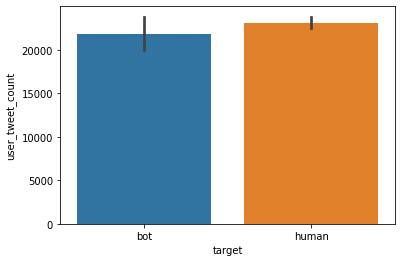

In [51]:
sns.barplot(data=df, x='target', y='user_tweet_count')

<AxesSubplot:xlabel='target', ylabel='user_list_count'>

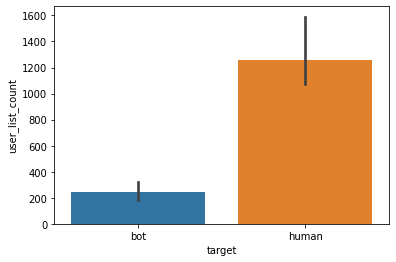

In [52]:
sns.barplot(data=df, x='target', y='user_list_count')

Text(0, 0.5, 'Lists count')

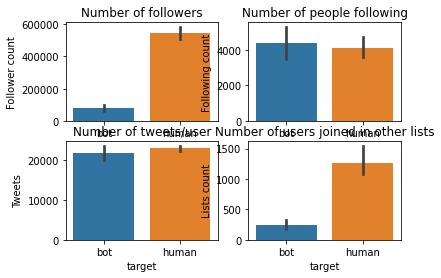

In [66]:
plt.title('User Data')
plt.subplot(2,2,1)
sns.barplot(data=df, x='target', y='user_followers_cnt')
plt.title('Number of followers')
plt.ylabel('Follower count')
plt.subplot(2,2,2)
sns.barplot(data=df, x='target', y='user_following_cnt')
plt.title('Number of people following')
plt.ylabel('Following count')
plt.subplot(2,2,3)
sns.barplot(data=df, x='target', y='user_tweet_count')
plt.title('Number of tweets/user')
plt.ylabel('Tweets')
plt.subplot(2,2,4)
sns.barplot(data=df, x='target', y='user_list_count')
plt.title('Number of users joined in other lists')
plt.ylabel('Lists count')

In [ ]:
source = data.barley()

alt.Chart(source).mark_bar().encode(
    x='target:Q',
    y='user_followers_cnt:O',
    color='target:N',
    row='site:N'
)

Text(0.5, 0, '')

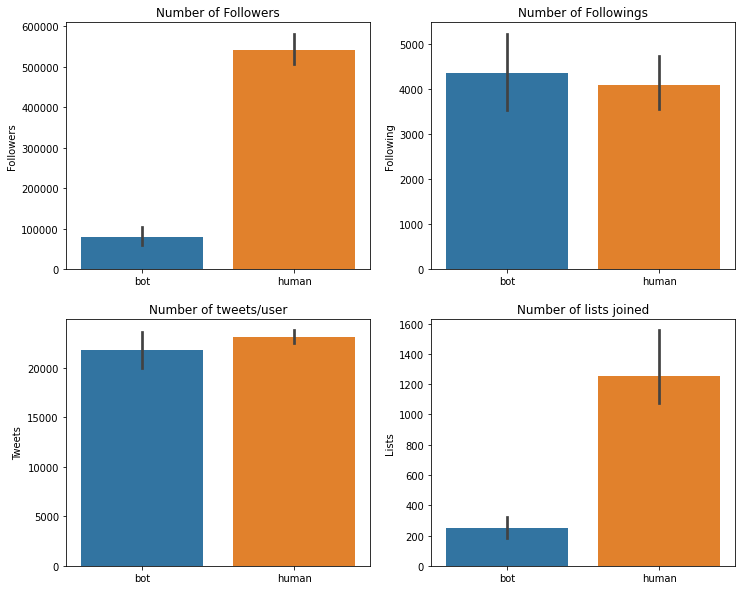

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))



sns.barplot(ax=axes[0, 0], data=df, x='target', y='user_followers_cnt')
axes[0, 0].set_title('Number of Followers')
axes[0, 0].set_ylabel('Followers')
axes[0, 0].set_xlabel('')


sns.barplot(ax=axes[0, 1], data=df, x='target', y='user_following_cnt')
axes[0, 1].set_title('Number of Followings')
axes[0, 1].set_ylabel('Following')
axes[0, 1].set_xlabel('')

sns.barplot(ax=axes[1, 0], data=df, x='target', y='user_tweet_count')
axes[1, 0].set_title('Number of tweets/user')
axes[1, 0].set_ylabel('Tweets')
axes[1, 0].set_xlabel('')

sns.barplot(ax=axes[1, 1], data=df, x='target', y='user_list_count')
axes[1, 1].set_title('Number of lists joined')
axes[1, 1].set_ylabel('Lists')
axes[1, 1].set_xlabel('')